# **Actividad 1.- Eliminación de anomalías de la imagen**

Como primer paso se importaran las librerías cv2, NumPy y Matplotlib. 

Se realiza la carga de la imagen con ruido con cv2, en este caso se optó por imágenes con ruido sal y pimienta. Posteriormente, se hace una copia de la imagen, con la función shape se extraen las medidas de la imagen.


In [1]:
import cv2 #libreria para procesado de imagenes
import numpy as np #libreria para trabajar con datos y matrices 
import matplotlib.pyplot as plt #libreria para hacer graficas y mostrar las imagenes

#lectura de imagenes
img1 = cv2.imread('imagen_ruido.png',0)
img2 = cv2.imread('imagen_ruido2.png',0)

img3 = cv2.imread('imagen_ruido3.png',0)
img4 = cv2.imread('imagen_ruido4.png',0)

imgCopy1 = img1.copy()/255
imgCopy2 = img2.copy()/255

imgCopy3 = img3.copy()/255
imgCopy4 = img4.copy()/255

ancho1,largo1 = imgCopy1.shape
ancho2,largo2 = imgCopy2.shape

ancho3,largo3 = imgCopy3.shape
ancho4,largo4 = imgCopy4.shape

Se realiza una función 1 a la cual se le pasarán los parámetros de la imagen a filtrar, así como las medidas de la imagen, se realiza una matriz de 0 del mismo tamaño que la imagen, se prosigue a crear un filtro o kernel de 3x3 el cual esta vez es paso alto, llamado filtro tipo "este". Con los ciclos for se realiza el proceso de convolución, lo cual implica multiplicar el kernel por cada uno de los píxeles de la imagen y realizar una sumatoria para finalmente regresar la imagen nueva con el filtro aplicado.

In [2]:
def Filtro1 (imgCopy,m,n):
  B = np.zeros((m,n))
  i=2
  j=2
  h=np.array([[-1,1,1],[-1,-2,1],[-1,1,1]]) #filtro o kernel tipo Este 
  for i in range(1,m-1): #convolucion
     for j in range(1,n-1):
       B[i,j] = (h[0,0]*imgCopy[i-1,j-1] + h[0,1]*imgCopy[i-1,j] + h[0,2]*imgCopy[i-1,j+1]
                    +h[1,0]*imgCopy[i,j-1] + h[0,1]*imgCopy[i,j] + h[1,2]*imgCopy[i,j+1]
                    +h[2,0]*imgCopy[i+1,j+1] + h[2,1]*imgCopy[i+1,j] + h[2,2]*imgCopy[i+1,j+1]
                    ) 
       B[i,j] = abs(B[i,j])  
  return B

Para este filtro gaussiano se creó una función filtro 2 a la cual le pasaremos los parámetros de la imagen y las medidas de esta, se crea el filtro gaussiano el cual es una exponencial elevada tal y como se muestra en la imagen 2, la fórmula está basada en el tutorial de YouTube del usuario jm M en su video contraste y reducción de ruido en imágenes, el cual explica dicha equación en el minuto 16.29.
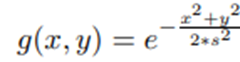

En el medio estará el máximo valor de la matriz y conforme avance se bajará el valor del píxel, con los ciclos for se realiza nuevamente el proceso de convolución y se retorna nuevamente la matriz.

In [3]:
def Filtro2 (imgCopy,m,n): #Filtro Gaussiano
  B = np.zeros((m,n))
  i=2
  j=2
  #filtro Gauss de 10x10
  x,y=np.meshgrid(np.linspace(-1,1,10),np.linspace(-1,1,10))
  d = np.sqrt(x*x + y*y)
  sigma, mu = 1.0, 1.0
  h = np.exp(-((d-mu)**2 / (2.0 * sigma**2))) 
  for i in range(1,m-1): #convolucion
     for j in range(1,n-1):
       B[i,j] = (h[0,0]*imgCopy[i-1,j-1] + h[0,1]*imgCopy[i-1,j] + h[0,2]*imgCopy[i-1,j+1]
                    +h[1,0]*imgCopy[i,j-1] + h[0,1]*imgCopy[i,j] + h[1,2]*imgCopy[i,j+1]
                    +h[2,0]*imgCopy[i+1,j+1] + h[2,1]*imgCopy[i+1,j] + h[2,2]*imgCopy[i+1,j+1]
                    )  
  return B

Por último se indica el tamaño de las imágenes y mediante la librería plt se coloca la función imshow y se manda a llamar la funciones creadas con el filtro que se requiera aplicar a la imagen, le indicamos los parámetros a pasar los cuales son la imagen con su tamaño y se le agrega el título a cada imagen para diferenciarlas, al ejecutarla se observan los resultados finales de los filtros aplicados.

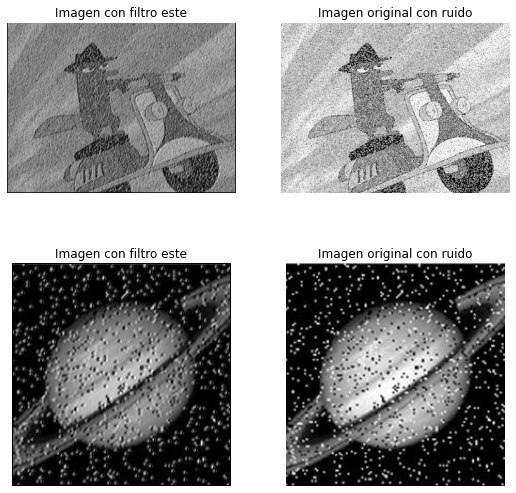

In [4]:
fig = plt.figure(1)
fig.set_size_inches(9, 9) #tamaño de las imagenes

plt.subplot(2,2,1)
plt.imshow(Filtro1(imgCopy1,ancho1,largo1),'gray')
plt.axis('off')
plt.title('Imagen con filtro este')

plt.subplot(2,2,2)
plt.imshow(img1,'gray')
plt.axis('off')
plt.title('Imagen original con ruido')

plt.subplot(2,2,3)
plt.imshow(Filtro1(imgCopy2,ancho2,largo2),'gray')
plt.axis('off')
plt.title('Imagen con filtro este')

plt.subplot(2,2,4)
plt.imshow(img2,'gray')
plt.axis('off')
plt.title('Imagen original con ruido')
plt.show()



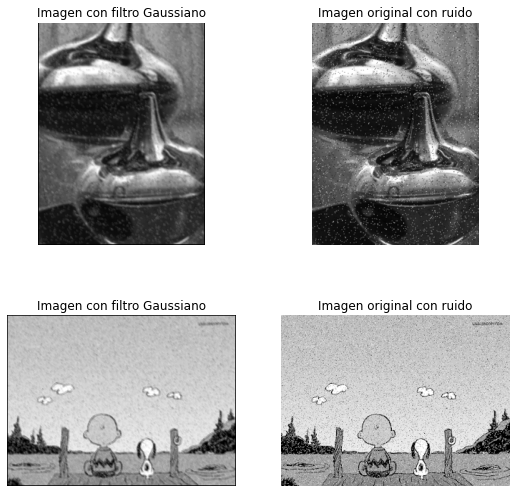

In [5]:
fig = plt.figure(2)
fig.set_size_inches(9, 9)

plt.subplot(2,2,1)
plt.imshow(Filtro2(imgCopy3,ancho3,largo3),'gray')
plt.axis('off')
plt.title('Imagen con filtro Gaussiano')

plt.subplot(2,2,2)
plt.imshow(img3,'gray')
plt.axis('off')
plt.title('Imagen original con ruido')

plt.subplot(2,2,3)
plt.imshow(Filtro2(imgCopy4,ancho4,largo4),'gray')
plt.axis('off')
plt.title('Imagen con filtro Gaussiano')

plt.subplot(2,2,4)
plt.imshow(img4,'gray')
plt.axis('off')
plt.title('Imagen original con ruido')
plt.show()



                                                                                                            **Autor: Juan carlos Romero Perez**

**Bibliografía**

jm M. [@jmm5493] (14 de mayo del 2020). Contraste y reducción de ruido en imágenes [Archivo de video]. Youtube. https://www.youtube.com/watch?v=UhW8Kxsnu2g&t=588s

Proyectos JC. [@proyectos-jc] (23 de marzo del 2021). Filtros de imágenes en Python y OpenCv [Archivo de video]. Youtube. https://www.youtube.com/watch?v=b4h-IUfsuq8

